### SQL Zillow Project
GitHub: @guzmanwolfrank

Volatile changes are occurring in the United States housing market.  Here we look at the data on Home Value to analyze which locations have the highest market values and which locations have sustained an above average move upward in price.   

In [1]:
#Imports
import sqlite3
import pandas as pd    
import numpy as np 
import seaborn as sns
import warnings 
import csv 
import matplotlib.pyplot as plt


# Ignore all warnings 
warnings.filterwarnings('ignore')


# Import CSV file and Convert to a Pandas DataFrame
csv_file = r"C:\Users\Wolfrank\Desktop\Zillow.csv"
df = pd.read_csv(csv_file).round(2)
#display(df)

In [2]:
# Show all columns in df
column_names = df.columns
print(column_names)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
       '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31'],
      dtype='object', length=288)


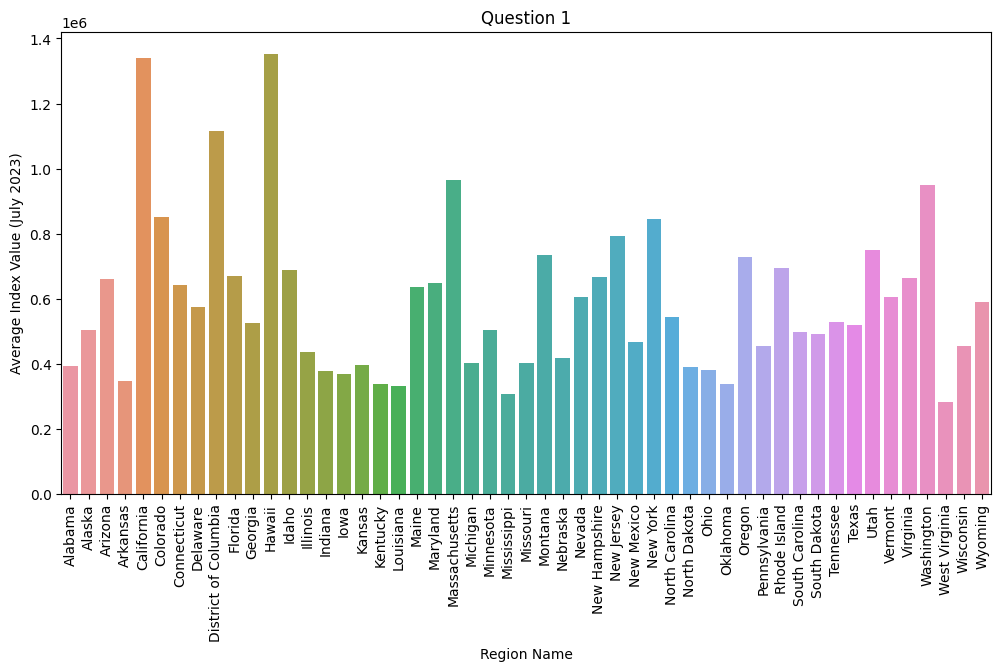

DatabaseError: Execution failed on sql '
    SELECT StateName, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY StateName
    ORDER BY Avg_Index_2023 DESC
    LIMIT 1;

    SELECT StateName, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY StateName
    ORDER BY Avg_Index_2023 ASC
    LIMIT 1;
    ': You can only execute one statement at a time.

<Figure size 1200x600 with 0 Axes>

In [5]:
#Clean Data 



# Load your data into a DataFrame (assuming it's in a CSV file)
data = df

# Connect to a SQLite database (you can use your preferred database)
conn = sqlite3.connect('housing_data.db')
data.to_sql('housing', conn, if_exists='replace', index=False)

# Define the SQL queries
queries = [
    # 1. Get the average index value for each region in July 2023.
    """
    SELECT RegionName, AVG("2023-07-31") AS Avg_Index_July2023
    FROM housing
    GROUP BY RegionName;
    """,

    # 2. Find the states with the highest and lowest average index values in 2023.
    """
    SELECT StateName, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY StateName
    ORDER BY Avg_Index_2023 DESC
    LIMIT 1;

    SELECT StateName, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY StateName
    ORDER BY Avg_Index_2023 ASC
    LIMIT 1;
    """,

    # 3. Calculate the average index value for the top 10 regions with the highest index in 2023.
    """
    SELECT RegionName, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY RegionName
    ORDER BY Avg_Index_2023 DESC
    LIMIT 10;
    """,

    # 4. Find the regions where the index increased the most from 2000 to 2023.
    """
    SELECT RegionName, ("2023-07-31" - "2000-01-31") AS Index_Increase
    FROM housing
    ORDER BY Index_Increase DESC
    LIMIT 10;
    """,

    # 5. Get the average index values for the top 5 states with the most regions.
    """
    SELECT StateName, COUNT(RegionName) AS Num_Regions, AVG("2023-07-31") AS Avg_Index_2023
    FROM housing
    GROUP BY StateName
    ORDER BY Num_Regions DESC
    LIMIT 5;
    """,

    # 6. Calculate the quarterly median index values for a specific region (replace RegionName).
    """
    SELECT
        EXTRACT(YEAR FROM YourDateColumn) AS Year,
        EXTRACT(QUARTER FROM YourDateColumn) AS Quarter,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY YourDateColumn) AS Median_Index
    FROM housing
    WHERE RegionName = 'YourRegionName'
    GROUP BY Year, Quarter
    ORDER BY Year, Quarter;
    """
]

# Execute SQL queries and create Seaborn charts
for i, query in enumerate(queries, 1):
    plt.figure(figsize=(12, 6))
    
    # Execute the SQL query
    result = pd.read_sql_query(query, conn)
    
    # Plot the data using Seaborn
    if i <= 5:
        sns.barplot(x='RegionName', y='Avg_Index_July2023', data=result)
        plt.xticks(rotation=90)
        plt.title(f'Question {i}')
        plt.xlabel('Region Name')
        plt.ylabel('Average Index Value (July 2023)')
    elif i == 6:
        sns.lineplot(x='Year', y='Median_Index', hue='Quarter', data=result)
        plt.title(f'Question {i}')
        plt.xlabel('Year')
        plt.ylabel('Median Index Value')
    else:
        sns.barplot(x='StateName', y='Avg_Index_2023', data=result)
        plt.xticks(rotation=90)
        plt.title(f'Question {i}')
        plt.xlabel('State Name')
        plt.ylabel('Average Index Value (2023)')
    
    plt.show()

# Close the database connection
conn.close()
